<a href="https://colab.research.google.com/github/Svhugani/QOptics/blob/main/g2g3_3CavitiesBalanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
pip install qutip

In [45]:
import qutip as qt
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files

In [65]:
def g_func(a, rho_ss, pow):
  if pow == 2:
    delim = qt.expect(a.dag() * a, rho_ss) 
    if delim != 0:
      res =  qt.expect(a.dag() * a.dag() * a * a, rho_ss) / (delim * delim)
    else: res = 0
  elif pow == 3:
    delim = qt.expect(a.dag() * a, rho_ss)
    if delim != 0:
      res =  qt.expect(a.dag() * a.dag() * a.dag() * a * a * a, rho_ss) / (delim * delim * delim)
    else: res = 0
  else:
    return

  return res


In [66]:
omega = 1
gamma = 0.01 * omega 
betaList = np.linspace(gamma / np.sqrt(2), 10 * gamma / np.sqrt(2), 100)

In [68]:
def correlations_g23(beta):
  omega = 1
  gamma = 0.01 * omega 
  dim = 5

  I = qt.identity(dim)
  a1 = qt.tensor(qt.destroy(dim), I, I)
  a2 = qt.tensor(I, qt.destroy(dim), I)
  a3 = qt.tensor(I, I, qt.destroy(dim))

  Hamilt = omega * (a1.dag() * a1 + a2.dag() * a2 + a3.dag() * a3) + beta * (a1.dag() * a2 + a2.dag() * a1  + a2.dag() * a3 + a3.dag() * a2 )
  print ("beta is: " +str(beta))

  collapse = [np.sqrt(2 * gamma ) * a1, np.sqrt(2 * gamma) * a3.dag()]
  rho_ss = qt.steadystate(Hamilt, collapse, method='power', use_rcm=True)
  #rho_ss = qt.steadystate(Hamilt, collapse)

  g2_1 = g_func(a1, rho_ss, 2)
  g2_2 = g_func(a2, rho_ss, 2)
  g2_3 = g_func(a3, rho_ss, 2)

  g3_1 = g_func(a1, rho_ss, 3)
  g3_2 = g_func(a2, rho_ss, 3)
  g3_3 = g_func(a3, rho_ss, 3)

  results = [g2_1, g2_2, g2_3, g3_1, g3_2, g3_3]
  
  return results

In [69]:
res = qt.parallel.parfor(correlations_g23, betaList)
#res = qt.parallel_map(correlations_g23, betaList)
res = np.array(res)

beta is: 0.0070710678118654745
beta is: 0.0077138921583986995
beta is: 0.008356716504931925
beta is: 0.008999540851465149
beta is: 0.009642365197998375
beta is: 0.0102851895445316
beta is: 0.010928013891064825
beta is: 0.011570838237598049
beta is: 0.012213662584131275
beta is: 0.0128564869306645
beta is: 0.013499311277197725
beta is: 0.014142135623730949
beta is: 0.014784959970264175
beta is: 0.0154277843167974
beta is: 0.016070608663330627
beta is: 0.01671343300986385
beta is: 0.017356257356397075
beta is: 0.0179990817029303
beta is: 0.018641906049463523
beta is: 0.01928473039599675
beta is: 0.019927554742529975
beta is: 0.0205703790890632
beta is: 0.021213203435596427
beta is: 0.02185602778212965
beta is: 0.022498852128662875
beta is: 0.0231416764751961
beta is: 0.023784500821729327
beta is: 0.02442732516826255
beta is: 0.025070149514795775
beta is: 0.025712973861329
beta is: 0.026355798207862224
beta is: 0.02699862255439545
beta is: 0.027641446900928675
beta is: 0.0282842712474619


In [70]:
def PlotGPUResults(res):

  fig = plt.figure()
  fig.set_size_inches(15, 7)
  ax = fig.add_subplot(1, 1, 1)
  ax.grid()
  ax.legend()
  ax.set_title(" correlation functions")
  line1 = ax.plot(res[ :, 0], linestyle = "solid", linewidth = 2 ,label = "g2 for: a1+, and a1" )
  line2 = ax.plot(res[ :, 1], linestyle = "solid", linewidth = 2 ,label = "g2 for: a3+, and a3" ) 
  line3 = ax.plot(res[ :, 2], linestyle = "solid", linewidth = 2 ,label = "g2 for: a1+, and a2" )
  line4 = ax.plot(res[ :, 3], linestyle = "dotted", linewidth = 2 ,label = "g3 for: a1+, and a1" )
  line5 = ax.plot(res[ :, 4], linestyle = "dotted", linewidth = 2 ,label = "g3 for: a3+, and a3" ) 
  line6 = ax.plot(res[ :, 5], linestyle = "dotted", linewidth = 2 ,label = "g3 for: a1+, and a2" )

  ax.set_label("subFor" )
  ax.legend()


  mainTitle = "g^2, g^3 for Balanced 3 cavities system"
  fig.suptitle(mainTitle, fontsize=16)
  plt.show()
  filename = mainTitle + ".png"
  fig.savefig(filename)

  files.download(filename)   


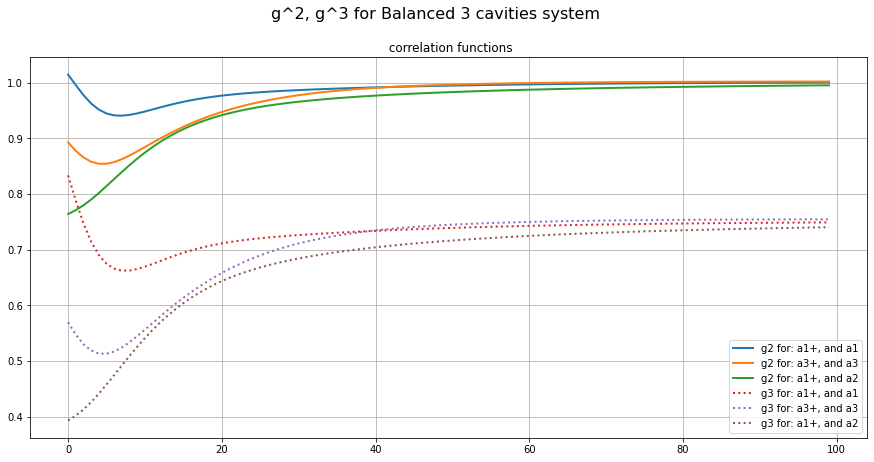

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [71]:
PlotGPUResults(res)